In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analysis/Data Analysis.xlsx
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
path='/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
df_train=pd.read_csv(path)

In [71]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [72]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

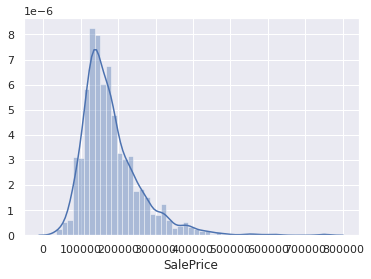

In [73]:
sns.distplot(df_train['SalePrice'])

In [74]:
#skewness and kurtosis
print(f'Skewness of distribution is',df_train['SalePrice'].skew())
print(f'Kurtosis of distribution is',df_train['SalePrice'].kurt())


Skewness of distribution is 1.8828757597682129
Kurtosis of distribution is 6.536281860064529


In [75]:
var='GrLivArea'
df=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

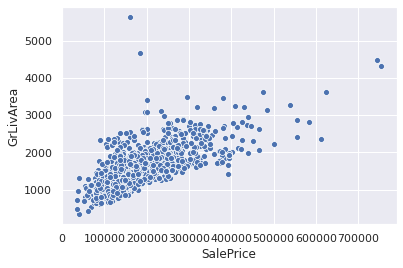

In [76]:
df
sns.scatterplot(x='SalePrice',y='GrLivArea',data=df)

In [77]:
var1='TotalBsmtSF'
df1=pd.concat([df_train['SalePrice'],df_train[var1]],axis=1)



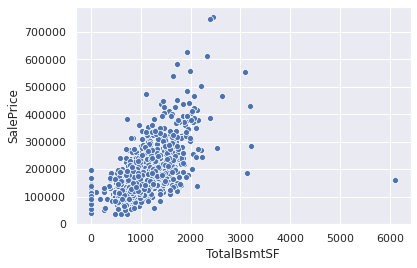

In [78]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df1)

In [79]:
var='OverallQual'
df2=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
df2

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


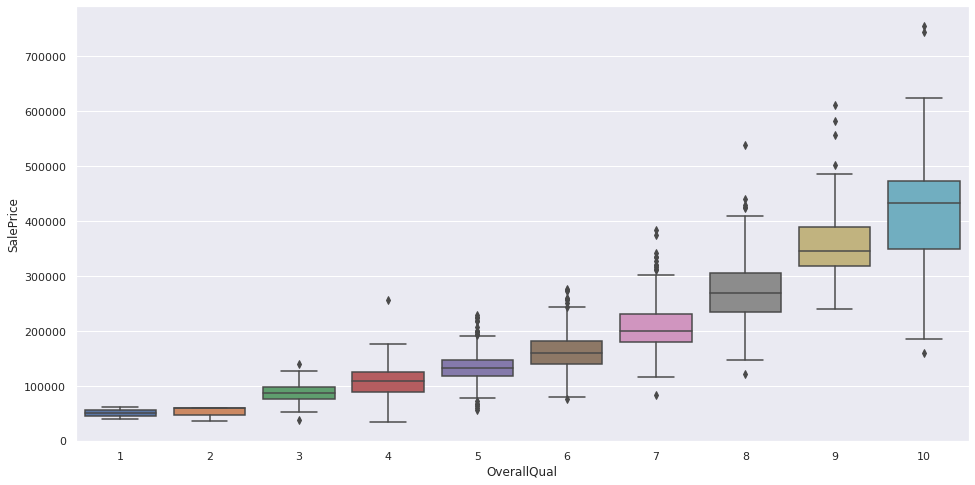

In [80]:
fig,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=df2)

In [81]:
var='OverallCond'
df3=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
df3

,SalePrice,OverallCond
0,208500,5
1,181500,8
2,223500,5
3,140000,5
4,250000,5
...,...,...
1455,175000,5
1456,210000,6
1457,266500,9
1458,142125,6


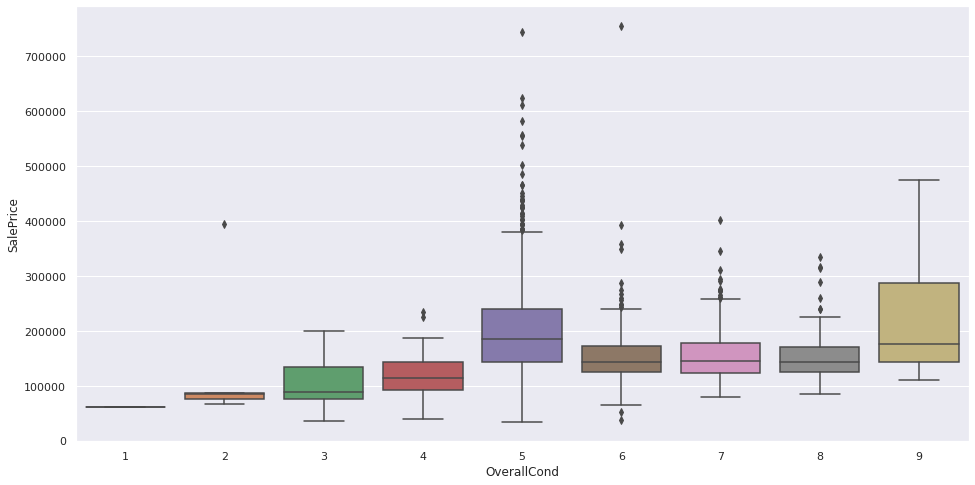

In [82]:
fig,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y='SalePrice',data=df3)

In [83]:
var='YearBuilt'
df3=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
df3

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000
...,...,...
1455,175000,1999
1456,210000,1978
1457,266500,1941
1458,142125,1950


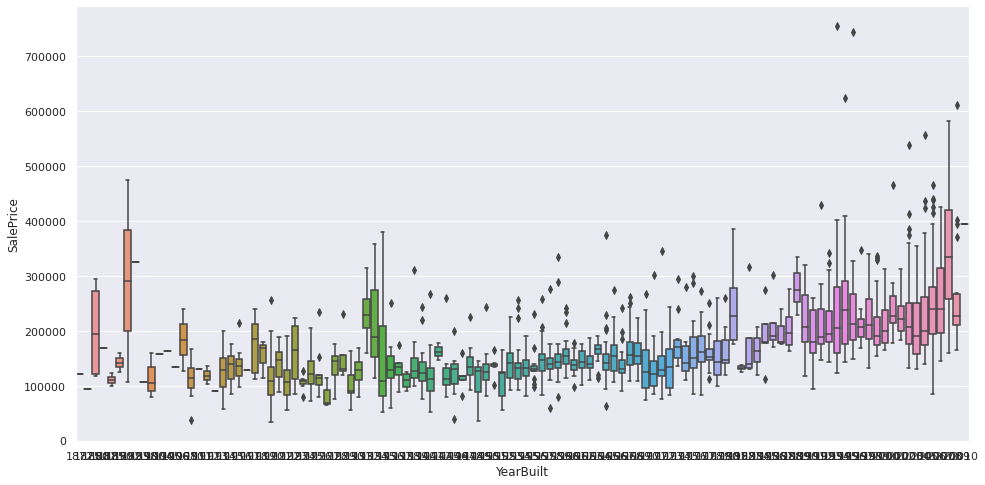

In [84]:
fig,ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var,y='SalePrice',data=df3)


We found that following variables has strong relationship with target variable

**Numerical variables**
* GrLivArea
* TotalBsmtSF

**Categorical variables**
* OverallCond
* OverallQual
* YearBuilt


Correlation Matrix(heatmap style)


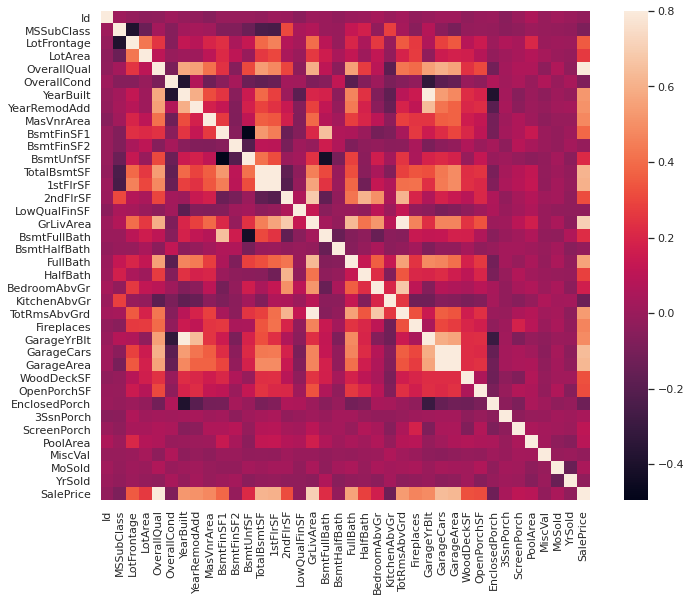

In [85]:
corrmat=df_train.corr()
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,vmax=0.8)

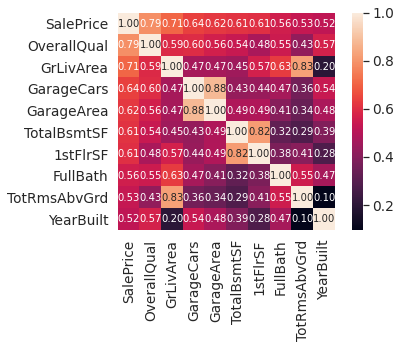

In [86]:
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

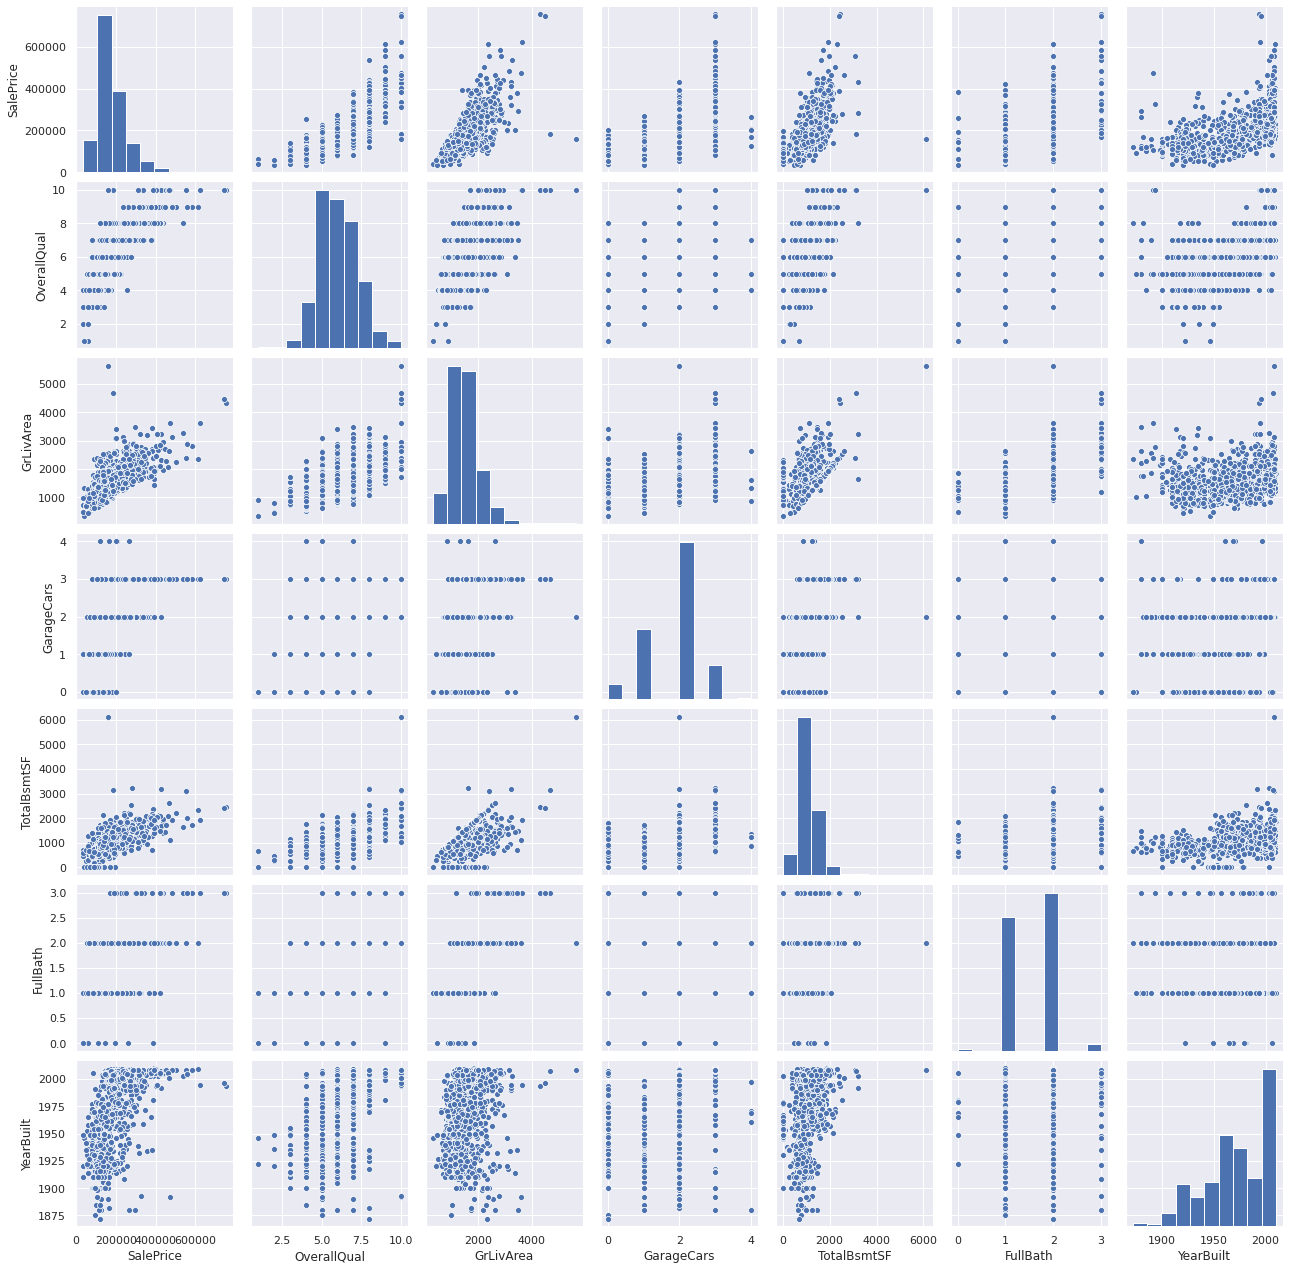

In [87]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()


In [88]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
df_null_proportion=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
df_null_proportion.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [89]:
df_train=df_train.drop((df_null_proportion[df_null_proportion['Total']>1]).index,1)


In [90]:
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [91]:
df_train.isnull().sum().max()

0

In [92]:
from sklearn.preprocessing import StandardScaler
sale_price_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

In [93]:
sale_price_scaled
low_range=sale_price_scaled[sale_price_scaled[:,0].argsort()][:10]
high_range=sale_price_scaled[sale_price_scaled[:,0].argsort()][-10:]

In [94]:
print('Outer range (low) of the distribution')
print(low_range)
print('\n Outer range (high) of the distribution')
print(high_range)

Outer range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

 Outer range (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


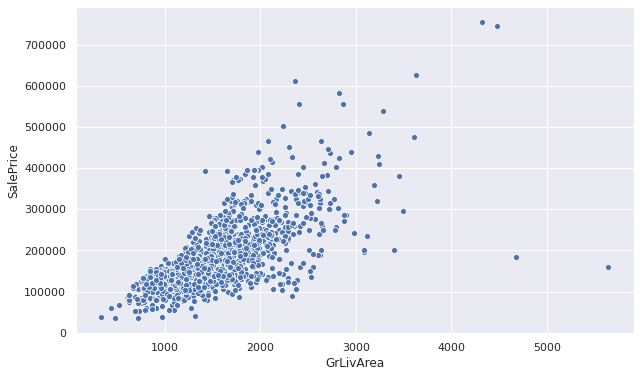

In [95]:
var='GrLivArea'
data=pd.concat([df_train[var],df_train['SalePrice']],axis=1)
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=var,y='SalePrice',data=data)

In [96]:
sorted_value=df_train.sort_values(by='GrLivArea',ascending=False)[:2]
sorted_value[['Id','GrLivArea','SalePrice']]

,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750


In [97]:
df_train.drop(df_train[df_train['Id']==1299].index)
df_train.drop(df_train[df_train['Id']==524].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


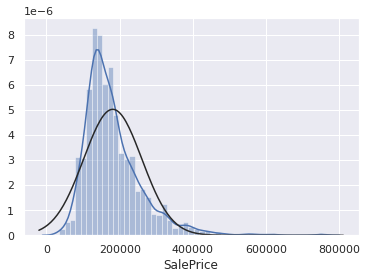

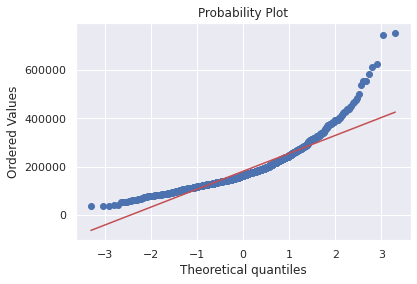

In [104]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [105]:
df_train['SalePrice']=np.log(df_train['SalePrice'])

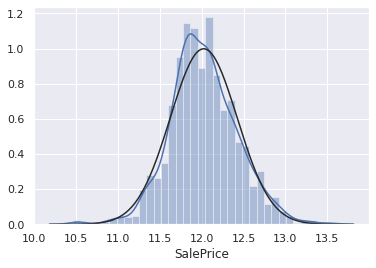

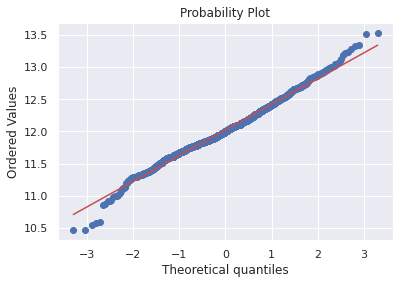

In [107]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

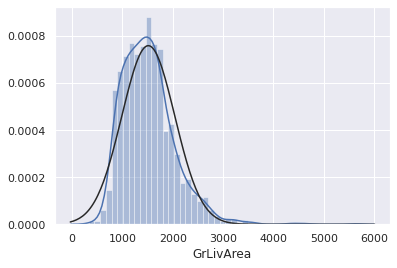

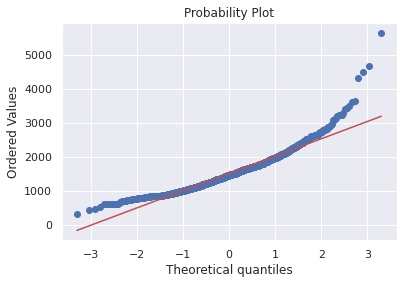

In [108]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

In [109]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

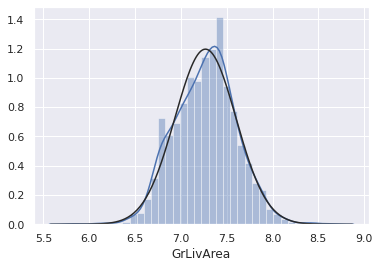

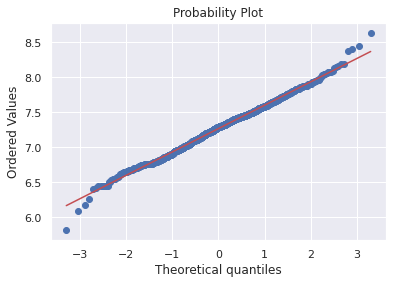

In [110]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

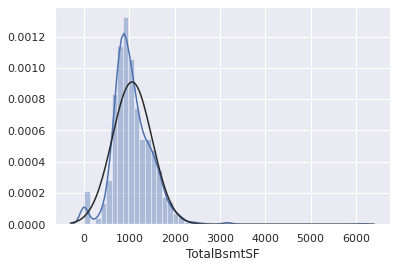

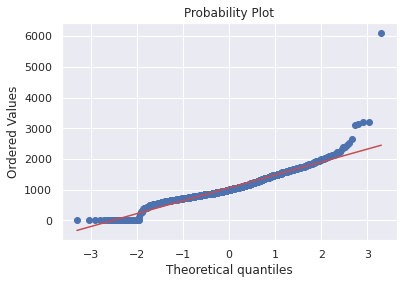

In [111]:
sns.distplot(df_train['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)

In [112]:
df_train['HasBsmt']=pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)

In [114]:
df_train['HasBsmt']=0

In [115]:
df_train['HasBsmt']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: HasBsmt, Length: 1459, dtype: int64

In [116]:
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt']=1

In [117]:
df_train['HasBsmt'].value_counts()

1    1422
0      37
Name: HasBsmt, dtype: int64

In [120]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

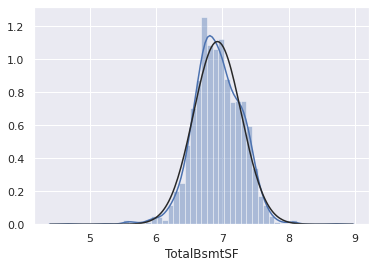

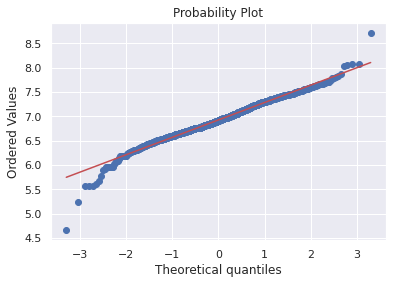

In [126]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)


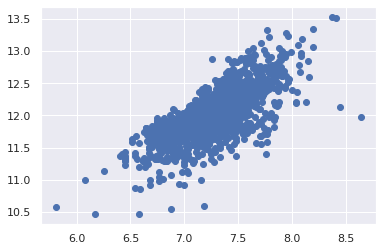

In [127]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

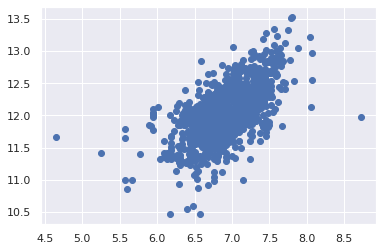

In [128]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [ ]:
df_train=pd.get_dummies(df_train)